<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/GoogleNet%20Model/Fine_Tuning_GooglNet%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg  
  inflating: Final datateset for Image/validation/happy/16238.jpg  
  inflating: Final datateset for Image/validation/happy/16275.jpg  
  inflating: Final datateset for Image/validation/happy/1628.jpg 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
     

In [ ]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [ ]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
# Define the input shape of the model
input_shape = (224, 224, 3)

# Load the pre-trained InceptionV3 model without the top layers
google_net = InceptionV3(
    include_top=False,
    weights= 'imagenet',
    input_shape=input_shape
)

# Display the output shape of the model
google_net.output

87910968/87910968 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'mixed10')>

In [ ]:
for layer in google_net.layers:
  layer.trainable = True

In [ ]:
x=Flatten()(google_net.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=google_net.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 282s 647ms/step - loss: 1.9563 - accuracy: 0.2966
Epoch 2/25
351/351 [==============================] - 223s 635ms/step - loss: 1.4744 - accuracy: 0.4600
Epoch 3/25
351/351 [==============================] - 225s 641ms/step - loss: 1.3343 - accuracy: 0.5068
Epoch 4/25
351/351 [==============================] - 225s 641ms/step - loss: 1.2346 - accuracy: 0.5442
Epoch 5/25
351/351 [==============================] - 225s 639ms/step - loss: 1.2688 - accuracy: 0.5412
Epoch 6/25
351/351 [==============================] - 226s 644ms/step - loss: 1.1878 - accuracy: 0.5674
Epoch 7/25
351/351 [==============================] - 226s 645ms/step - loss: 1.2236 - accuracy: 0.5448
Epoch 8/25
351/351 [==============================] - 228s 649ms/step - loss: 1.1290 - accuracy: 0.5718
Epoch 9/25
351/351 [==============================] - 228s 649ms/step - loss: 1.0871 - accuracy: 0.5972
Epoch 10/25
351/351 [==============================] - 224s 637m

Accuracy:  0.6820257902145386


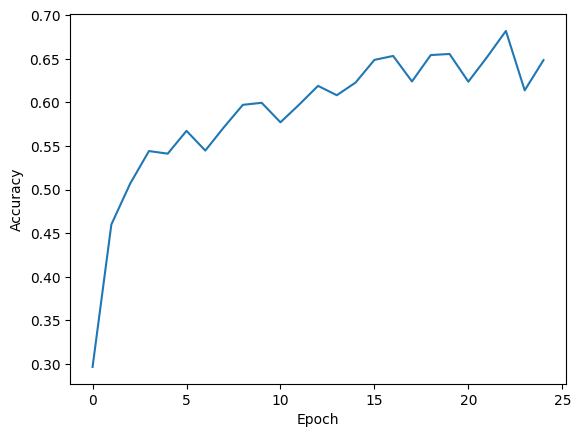

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [ ]:
model.save('E:\BAUST\7th Semester\CSE 4132 Neural Network Sessional\Project\model\Fine_Tuning_GoogleNet_model.h5')

In [ ]:
# Tesing
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model('E:\BAUST\7th Semester\CSE 4132 Neural Network Sessional\Project\model\Fine_Tuning_GoogleNet_model.h5')

In [ ]:
# Define the classes
classes = ['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'netural', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']
     

In [ ]:
# Load the image to be tested
image = Image.open('/content/Final datateset for Image/validation/rasa/50.png')

# Convert the image to RGB format
image = image.convert('RGB')

# Resize the image to the same size used for training the model
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

In [ ]:
# Predict the class of the image using the pre-trained model
predictions = model.predict(image_array)

1/1 [==============================] - 0s 27ms/step


In [ ]:
# Get the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the name of the predicted class
predicted_class = classes[predicted_class_index]

# Print the predicted class
print('The predicted class is:', predicted_class)

The predicted class is: joiariya
